In [65]:
!pip install sympy matplotlib numpy scipy IPython itikz 

In [66]:
%load_ext itikz
%matplotlib notebook

The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


In [67]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
r, beta, alpha, omega1 = sp.symbols('r beta alpha omega1')
T1 = sp.Function('T1')
T2 = sp.Function('T2')
phi = sp.Function('phi')
varphi = sp.Function('varphi')

from IPython.display import display, Math,Latex
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})


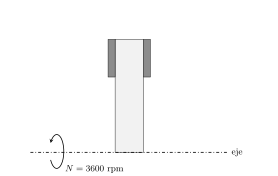

In [68]:
%%itikz --scale 3
\input{freno_esquema.tex} 



In [69]:
b = 5 *1e-3
N = 3600 /2
omega = N*1/60*2*np.pi
mu = 0.15 
P = 1 *1e6
k = 75 
Rd = 4.0 *1e-2
Rp = 3.0 *1e-2
h = 20+1500 *(omega1/100)**1.25

alpha_i = 2*P*mu*omega/b/k
beta_i = (2*h/k/b)**.5
Tinf = 30 

Balance térmico en disco en contacto con pastilla de freno
$$\frac{d}{dr}(-k\frac{dT}{dr}2\pi r b)dr = 4\pi r^2p\mu\omega dr$$

In [70]:
equation2 = sp.Derivative((r*sp.Derivative(T2(r),r,evaluate=False)),r)+r**2*alpha 
display(Latex(r'Para $r>R_p \\ \displaystyle'+ sp.latex(equation2)+'=0$'))
display(Latex(r'$\displaystyle\alpha=2\frac{p\mu\omega}{k b}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [71]:
T2f = sp.dsolve(equation2).args[1]
T2f = T2f.subs('C2','A1').subs('C1','A2')
#T2f = T2f.subs('C1','C2')
display(T2f)


#condicion de borde aislado
display(Latex(r'Condicion de borde aislado $\displaystyle\left.\frac{dT_2}{dr}\right|_{r=R_d}=0$'))
#C2i = sp.solve(T2f.diff('r').subs('r',Rd).subs('alpha',alpha_i))[0]
display(Latex(r'$\displaystyle'+sp.latex(T2f.diff(r))+'=0$'))
#T2f = T2f.subs('C2',C2i)
A1i = sp.solve(T2f.diff(r),'A1')

A1*log(r) + A2 - alpha*r**3/9

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

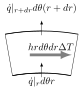

In [72]:
%%itikz 
\input{freno_calor.tex} 


Para la región $r<R_p$:

\begin{eqnarray}
\dot q|_{r+dr}d\theta(r+dr) - \dot q|_r d\theta rb& =& 2h dr (rd\theta) \Delta T\\
\end{eqnarray}
$\dot q|_{r+dr}b =  \dot q|_r + \partial \dot q/\partial r|_r dr $

\begin{eqnarray}
(\dot q|_r dr+ \partial \dot q/\partial r|_r r )   b&=& 2h dr \Delta T \\
\partial/\partial r(r   \dot q_r)  dr b&=&  2h r dr \Delta T
\end{eqnarray}
Sea $\varphi = T-T_\infty$ y $\beta^2 = 2h/kb$
\begin{equation}
\frac{\partial}{\partial r}\left(-r \frac{\partial \varphi}{\partial r}\right) = \beta^2 r \varphi
\end{equation}

Para $\varphi = T - T_\infty$.

In [73]:
equation1 = sp.Derivative((r*sp.Derivative(varphi(r),r,evaluate=False)),r)-beta**2*r*varphi(r) 
display(Latex(r'La ecuación $\displaystyle'+ sp.latex(equation1)+'=0$'))
phi1 = sp.dsolve(equation1).args[1]
phi1 = phi1.subs('C1','B1').subs('C2','B2')
display(Latex(r'Tiene solución general, $\varphi (r) = '+sp.latex(phi1)+'$'))
display(Latex(r'Solución finita en $r=0, \Longrightarrow \varphi(r=0)='+sp.latex(phi1.subs('r',0))+'$'))
display(Latex(r'$\Longrightarrow \varphi(r)='+sp.latex(phi1.subs('B2',0))+'$'))
phi1 = phi1.subs('B2',0)
T1 = phi1+Tinf
display(Latex(r'Calor en $\displaystyle r=R_p,\\ \displaystyle-k\frac{d\varphi}{dr}=-k\frac{dT_2}{dr}$'))
B1i = sp.solve(-T2f.diff(r)+phi1.diff(r),'B1')
display(Latex('$B_1= '+sp.latex(B1i[0])+'$'))


display(Latex(r'Temperaturas en $\displaystyle r=R_p,\\T_1=T_2$'))

A2i = sp.solve(T2f-T1,'A2')
display(Latex(r'$A_2='+sp.latex(A2i)+'$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [74]:
A1 = A1i[0].subs('alpha',alpha_i).subs('r',Rd)
B1 = sp.N(B1i[0].subs('r',Rp).subs('A1',A1).subs('beta',beta_i).subs('alpha',alpha_i))
A2 = A2i[0].subs('r',Rp).subs('A1',A1).subs('beta',beta_i).subs('alpha',alpha_i).subs('B1',B1)

Temp = sp.Piecewise( (T1, r<Rp), (T2f, r>=Rp) )

In [75]:
T1_fun = sp.lambdify([r],T1.subs('beta',beta_i).subs('alpha',alpha_i).subs('B1',B1).subs('omega1',omega))

dT1dr_fun = sp.lambdify([r],T1.diff('r').subs('beta',beta_i).subs('alpha',alpha_i).subs('B1',B1).subs('omega1',omega))
T2_fun = sp.lambdify([r],T2f.subs('A1',A1).subs('alpha',alpha_i).subs('A2',A2).subs('omega1',omega))

Temp_fun = sp.lambdify([r],Temp.subs('A1',A1).subs('alpha',alpha_i).subs('A2',A2).subs('beta',beta_i).subs('B1',B1).subs('omega1',omega))


<IPython.core.display.Javascript object>


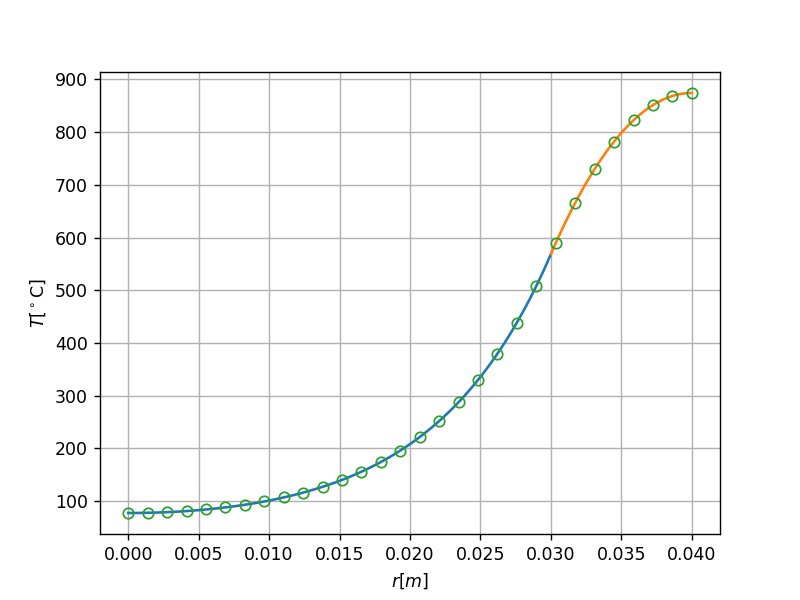

In [76]:
fig0,ax0 = plt.subplots()
r1 = np.linspace(0,Rp,100)
r2 = np.linspace(Rp,Rd,100)
r = np.linspace(1e-6,Rd,30)
ax0.plot(r1,T1_fun(r1))
ax0.plot(r2,T2_fun(r2))
ax0.plot(r,Temp_fun(r),'o',fillstyle='none')
ax0.set_xlabel('$r[m]$')
ax0.grid()
ax0.set_ylabel('$T[^\circ$C]');